In [88]:
!pip install tensorflow

In [95]:
import tensorflow as tf

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
tf.__version__

'2.14.0'

In [98]:
mnist=tf.keras.datasets.mnist

In [99]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/opt/conda/lib/python3.10/site-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [100]:
(X_train_full,Y_train_full),(X_test,Y_test)=mnist.load_data()

In [101]:
X_train_full.shape,Y_train_full.shape

((60000, 28, 28), (60000,))

In [102]:
X_test.shape,Y_test.shape

((10000, 28, 28), (10000,))

In [103]:
X_train,X_valid=X_train_full[5000:]/255,X_train_full[0:5000]/255

In [104]:
Y_train,Y_valid=Y_train_full[5000:],Y_train_full[0:5000]

In [105]:
X_train.shape,X_valid.shape

((55000, 28, 28), (5000, 28, 28))

In [106]:
Y_train.shape

(55000,)

In [107]:
valid=(X_valid,Y_valid)


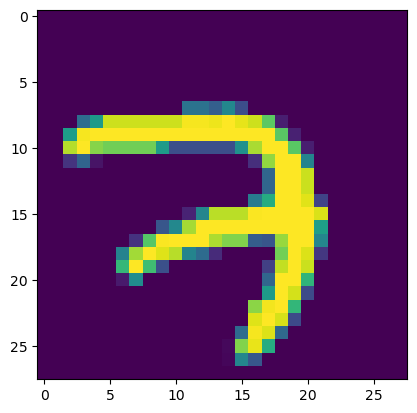

In [108]:
plt.imshow(X_train[0])

In [109]:
layers=[tf.keras.layers.Flatten(input_shape=[28,28],name="Input_layer"),
        tf.keras.layers.Dense(300,activation="relu",name="Layer2"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(100,activation="relu",name="Layer3"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(10,activation="softmax",name="output")]

In [110]:
model_clf=tf.keras.models.Sequential(layers)

In [111]:
model_clf.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Flatten)       (None, 784)               0         
                                                                 
 Layer2 (Dense)              (None, 300)               235500    
                                                                 
 batch_normalization_8 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 Layer3 (Dense)              (None, 100)               30100     
                                                                 
 batch_normalization_9 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 output (Dense)              (None, 10)               

In [112]:
model_clf.compile(loss="sparse_categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

In [113]:
epochs=30
valid=(X_valid,Y_valid)

In [114]:
history=model_clf.fit(X_train,Y_train,epochs=30,validation_data=valid)

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3299 - accuracy: 0.9013 - val_loss: 0.1485 - val_accuracy: 0.9590
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1605 - accuracy: 0.9530 - val_loss: 0.1125 - val_accuracy: 0.9688
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1182 - accuracy: 0.9661 - val_loss: 0.1005 - val_accuracy: 0.9700
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0931 - accuracy: 0.9727 - val_loss: 0.0898 - val_accuracy: 0.9730
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0757 - accuracy: 0.9781 - val_loss: 0.0866 - val_accuracy: 0.9750
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0649 - accuracy: 0.9816 - val_loss: 0.0824 - val_accuracy: 0.9742
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0554 - accuracy: 0.9834 - val_loss: 0.0774 - val_accuracy:

In [115]:
data=pd.DataFrame(history.history)

In [116]:
data

,loss,accuracy,val_loss,val_accuracy
0,0.329886,0.901255,0.148466,0.9590
1,0.160529,0.952982,0.112548,0.9688
2,0.118161,0.966055,0.100454,0.9700
3,0.093128,0.972655,0.089844,0.9730
4,0.075664,0.978073,0.086602,0.9750
5,0.064896,0.981618,0.082379,0.9742
6,0.055405,0.983436,0.077416,0.9760
7,0.047501,0.986691,0.076454,0.9762
8,0.041097,0.988491,0.075914,0.9780
9,0.035227,0.990018,0.076081,0.9770


<AxesSubplot: >

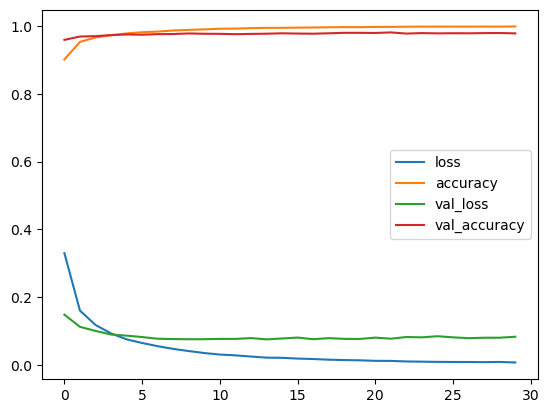

In [117]:
pd.DataFrame(history.history).plot()

In [121]:
X_test=X_test/255
model_clf.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0760 - accuracy: 0.9785


[0.076023168861866, 0.9785000085830688]

In [124]:
X_new=X_test[:3]
actual=Y_test[:3]

In [125]:
Y_predict=model_clf.predict(X_new)

1/1 [==============================] - 0s 156ms/step


In [126]:
Y_predict.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)